# Count Vectorizer

Goal: Create an algo that computes vectors of counts of words for texts.

In [119]:
import numpy  as np
import scipy as sp
import pandas as pd
from sklearn.cluster import kmeans_plusplus
import glob

Get full vocabulary size from dataset

In [120]:
vocab = set()

def getTextVocabulary(filepath, vocab):
   vect = dict()
   with open(filepath) as file:
      for line in file:
         for word in line.lower().translate({ord(i): None for i in '.?!-,"()'}).split():
            if word in vect:
               vect[word]+=1
            else:
               vect[word]=1
   return vocab.union({*vect.keys()})

filepaths = glob.glob("../datasets/bbc/*/*.txt")
dataset_size = len(filepaths)

for file in filepaths:
   try:
      vocab = getTextVocabulary(file,vocab)
   except Exception:
      print(file)
      print(Exception)
   
vocab

../datasets/bbc/sport/199.txt
<class 'Exception'>


{'airliner',
 'ellman',
 'daley',
 'challenger',
 'supports',
 '2628',
 "snow's",
 '51yearold',
 'efforts',
 '6600',
 'convert',
 'damming',
 "child's",
 'competitve',
 'near',
 'pitt',
 'henri',
 'spends',
 'blewitt',
 'cameroon',
 'hybrid',
 'easterby;',
 'algorithm',
 'andrew',
 'honestly',
 '$151m',
 'grab',
 'heir',
 'traviata',
 'toppling',
 'lovers',
 'intentions',
 'dimech',
 'interpreting',
 'seemed',
 'handcuffed',
 '£27473m',
 "offer'",
 'rockwool',
 'carries',
 'deficit',
 'vpcc4',
 'oil',
 'grants',
 'interactivity',
 'us$370m',
 'penalty',
 'nutritional',
 '1723',
 'clad',
 'viticulture',
 'yukos',
 'licences',
 'tours',
 'bbc',
 'sibneft',
 '51%',
 'flyhalf',
 '2101',
 'walker',
 'mbabane',
 'fm',
 'rossi',
 'rebound',
 'takeaway',
 'buyer',
 'relying',
 'quarrying',
 "jacob's",
 'highestcharting',
 'heroics',
 'camille',
 'thayer',
 'antiques',
 'arrangements',
 'coincided',
 'schwarzenegger',
 '311764',
 'inflated',
 'carter',
 "competitors'",
 'spikey',
 'hots',
 'pre

Then compute vectors for each text

In [89]:
vocabList = list(vocab)
vocabulary_size = len(vocabList)
print("vocab size: ", vocabulary_size)

def getTextVector(filepath):
  textVect = np.zeros((vocabulary_size,1))
  with open(filepath) as file:
      for line in file:
        for word in line.lower().translate({ord(i): None for i in '.?!-,"()'}).split():
          textVect[vocabList.index(word),0]+=1
  # normalize vector
  textVect = textVect/np.sum(textVect)
  return textVect

#initialization
X = getTextVector(filepaths[0])
print("single vector shape: ", X.shape) 
print(X)

for filepath in filepaths[1:]:
   try:
      X = np.c_[X, getTextVector(filepath)]
   except Exception:
      print(Exception)
  

X.shape

vocab size:  37124
single vector shape:  (37124, 1)
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
<class 'Exception'>


(37124, 2224)

In [94]:
# Calculate seeds from k-means++
centers_init, indices = kmeans_plusplus(X.T, n_clusters=5, random_state=0)

In [95]:
print(indices)
print(centers_init.shape)

[1653 1853  787  112 1744]
(5, 37124)


Computing distance between K-centers and texts

In [96]:
V_sport = getTextVector("../datasets/bbc/sport/001.txt")
V_business = getTextVector("../datasets/bbc/business/001.txt")
V_entertainment = getTextVector("../datasets/bbc/entertainment/001.txt")
V_politics = getTextVector("../datasets/bbc/politics/001.txt")
V_tech = getTextVector("../datasets/bbc/tech/001.txt")


In [98]:
def vector_distance(v1, v2):
    return np.sqrt(np.sum(np.square(v1 - v2)))

for i in range(5):
    print(vector_distance(V_sport, centers_init[i,:]))

31.648981274266795
29.99181733299662
32.14846102245641
32.37248943908978
32.321061723628375


Print the N most common words from the clusters

In [112]:
N = 30
ind_0 = np.argpartition(centers_init[4,:], -N)[-N:]

for i in range(N):
    print(vocabList[ind_0[i]])


### Results
# Cluster 5 seems to be politics
# Cluster 3 seems to be business
# Cluster 2 seems to tech
#

each
that
same
also
civil
as
agendas
chancellor
are
a
were
baume
government
in
blair
he
prime
minister
union
not
brown
on
said
was
and
the
of
between
mr
to


## Let's do it with sklearn now

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [159]:
vectorizer = CountVectorizer(input='filename', max_features=1000, lowercase=True, stop_words='english')
X_sklearn = vectorizer.fit_transform(filepaths)

In [160]:
print(X_sklearn.toarray())
print(X_sklearn.shape)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(2225, 1000)


In [161]:
# Calculate seeds from k-means++
centers_init_sklearn, indices_sklearn = kmeans_plusplus(X_sklearn.toarray(), n_clusters=5, random_state=0)

Apply PCA on K-means centers and dataset X in order to plot everything in 2d.

In [162]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_sklearn.toarray())
centers_init_sklearn_2d = pca.fit_transform(centers_init_sklearn)

In [163]:
print(X_2d.shape, centers_init_sklearn_2d.shape)

(2225, 2) (5, 2)


Let's plot everything now!

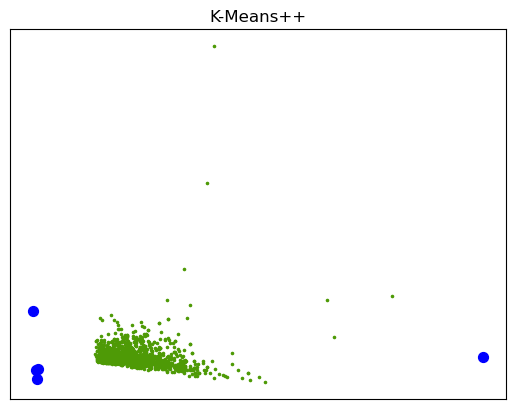

In [164]:
# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m", "#444444"]

#for k, col in enumerate(colors):
plt.scatter(X_2d[:, 0], X_2d[:, 1], c="#4E9A06", marker=".", s=10)

plt.scatter(centers_init_sklearn_2d[:, 0], centers_init_sklearn_2d[:, 1], c="b", s=50)
plt.title("K-Means++")
plt.xticks([])
plt.yticks([])
plt.show()

In [165]:
#Take a look at the most important words
vectorizer.get_feature_names_out()

array(['000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '22', '24', '25', '27', '28', '30', '40', '50', '500',
       '5bn', '60', 'ability', 'able', 'access', 'according', 'account',
       'accounts', 'accused', 'act', 'action', 'actor', 'actress',
       'actually', 'add', 'added', 'admitted', 'affected', 'africa',
       'age', 'agency', 'ago', 'agreed', 'agreement', 'ahead', 'aid',
       'air', 'airline', 'alan', 'album', 'allow', 'allowed', 'america',
       'american', 'analyst', 'analysts', 'andy', 'announced', 'annual',
       'anti', 'appeal', 'apple', 'approach', 'april', 'area', 'areas',
       'argued', 'arsenal', 'artists', 'asia', 'ask', 'asked',
       'association', 'asylum', 'athens', 'attack', 'attacks', 'attempt',
       'audience', 'australia', 'australian', 'authorities', 'available',
       'average', 'aviator', 'award', 'awards', 'away', 'backed', 'bad',


In [175]:
# let's take a look at the center's main words
KMeans_centers_words = vectorizer.inverse_transform(centers_init_sklearn)
print(KMeans_centers_words[0]) ## politics
print(KMeans_centers_words[1]) ## tech
print(KMeans_centers_words[2]) ## sports / entertainment ?
print(KMeans_centers_words[3]) ## business
print(KMeans_centers_words[4]) ## sports/entertainment?

['ban' 'blair' 'cabinet' 'chairman' 'committee' 'decided' 'election'
 'figure' 'foreign' 'given' 'government' 'held' 'huge' 'including' 'known'
 'labour' 'long' 'lords' 'minister' 'ministers' 'mp' 'mr' 'number'
 'opposition' 'party' 'period' 'personal' 'power' 'recent' 'said' 'shadow'
 'spokesman' 'stand' 'tony' 'trade' 'went' 'years']
['100' '17' '20' '200' '2006' '25' 'ability' 'age' 'ago' 'away' 'based'
 'bbc' 'big' 'book' 'chairman' 'children' 'china' 'chinese' 'claim'
 'computers' 'costs' 'countries' 'development' 'device' 'digital' 'doing'
 'education' 'end' 'expected' 'family' 'games' 'gave' 'getting' 'given'
 'going' 'home' 'idea' 'important' 'just' 'large' 'like' 'machine' 'make'
 'making' 'media' 'million' 'mobile' 'money' 'months' 'mr' 'need' 'number'
 'operating' 'order' 'pc' 'phones' 'plans' 'popular' 'probably' 'problems'
 'profit' 'programme' 'project' 'received' 'run' 'said' 'sale' 'says'
 'schools' 'second' 'seen' 'sell' 'service' 'set' 'speed' 'spend' 'state'
 'things